# Procesamiento de Textos
Este notebook introduce paso a paso el preprocesamiento de textos para tareas de análisis lingüístico y NLP. Utilizaremos textos en castellano y en lengua shipibo como ejemplo.


In [1]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 72.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [1]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("es_core_news_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# Montar Google Drive si se desea usar archivos allí
# from google.colab import drive
# drive.mount('/content/drive')

# Leer archivos locales (ajustar ruta si se sube a Colab)
with open("cuentos_castellano.txt", encoding="utf-8") as f:
    texto_castellano = f.read()

with open("narracion_shipibo.txt", encoding="utf-8") as f:
    texto_shipibo = f.read()

df = pd.read_csv("corpus_pequeno.csv")
df

,id,lengua,texto
0,1,castellano,Había una vez un zorro que vivía en lo más pro...
1,2,shipibo,"Rao maiti iká xobo, joshin joshin jema.\nInka ..."


In [3]:
texto_castellano

'Había una vez un zorro que vivía en lo más profundo del bosque. Cada mañana, salía a buscar comida.\nUn día encontró una trampa, y aunque logró escapar, aprendió a ser más cuidadoso.\nDesde entonces, enseñó a los demás animales cómo evitar los peligros del bosque.'

In [4]:
texto_shipibo

'Rao maiti iká xobo, joshin joshin jema.\nInka shiná ibo áinati.\nJakon baxa xawanai, jawen ani shiná.'

In [6]:
def limpieza_basica(texto):
  texto = texto.lower()
  texto = re.sub(r'[^a-záéíóúñü\s]', '', texto) #procesar diacriticos
  texto = re.sub(r'\s+', ' ', texto).strip()
  return texto

In [7]:
texto_limpieza_basica = limpieza_basica("HOLA.   ME llamo ErasMo")
texto_limpieza_basica

'hola me llamo erasmo'

In [8]:
df

,id,lengua,texto
0,1,castellano,Había una vez un zorro que vivía en lo más pro...
1,2,shipibo,"Rao maiti iká xobo, joshin joshin jema.\nInka ..."


In [12]:
limpieza_basica(df['texto'][1])

'rao maiti iká xobo joshin joshin jema inka shiná ibo áinati jakon baxa xawanai jawen ani shiná'

In [13]:
df['texto_limpio'] = df['texto'].apply(limpieza_basica)
df

,id,lengua,texto,texto_limpio
0,1,castellano,Había una vez un zorro que vivía en lo más pro...,había una vez un zorro que vivía en lo más pro...
1,2,shipibo,"Rao maiti iká xobo, joshin joshin jema.\nInka ...",rao maiti iká xobo joshin joshin jema inka shi...


In [14]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [15]:
df['tokens'] = df['texto_limpio'].apply(word_tokenize)
df

,id,lengua,texto,texto_limpio,tokens
0,1,castellano,Había una vez un zorro que vivía en lo más pro...,había una vez un zorro que vivía en lo más pro...,"[había, una, vez, un, zorro, que, vivía, en, l..."
1,2,shipibo,"Rao maiti iká xobo, joshin joshin jema.\nInka ...",rao maiti iká xobo joshin joshin jema inka shi...,"[rao, maiti, iká, xobo, joshin, joshin, jema, ..."


In [17]:
df['tokens'][0]

['había',
 'una',
 'vez',
 'un',
 'zorro',
 'que',
 'vivía',
 'en',
 'lo',
 'más',
 'profundo',
 'del',
 'bosque',
 'cada',
 'mañana',
 'salía',
 'a',
 'buscar',
 'comida',
 'un',
 'día',
 'encontró',
 'una',
 'trampa',
 'y',
 'aunque',
 'logró',
 'escapar',
 'aprendió',
 'a',
 'ser',
 'más',
 'cuidadoso',
 'desde',
 'entonces',
 'enseñó',
 'a',
 'los',
 'demás',
 'animales',
 'cómo',
 'evitar',
 'los',
 'peligros',
 'del',
 'bosque']

In [18]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [22]:

stopwords_es = set(stopwords.words('spanish'))

def eliminar_stopwords(tokens):
    return [token for token in tokens if token not in stopwords_es]

df['tokens_sin_stopwords'] = df['tokens'].apply(eliminar_stopwords)
df

,id,lengua,texto,texto_limpio,tokens,tokens_sin_stopwords
0,1,castellano,Había una vez un zorro que vivía en lo más pro...,había una vez un zorro que vivía en lo más pro...,"[había, una, vez, un, zorro, que, vivía, en, l...","[vez, zorro, vivía, profundo, bosque, cada, ma..."
1,2,shipibo,"Rao maiti iká xobo, joshin joshin jema.\nInka ...",rao maiti iká xobo joshin joshin jema inka shi...,"[rao, maiti, iká, xobo, joshin, joshin, jema, ...","[rao, maiti, iká, xobo, joshin, joshin, jema, ..."


In [27]:
def lematizar(texto):
    doc = nlp(texto)
    return [token.lemma_ for token in doc]

df['lemmas'] = df['texto_limpio'].apply(lematizar)
df

,id,lengua,texto,texto_limpio,tokens,tokens_sin_stopwords,lemmas
0,1,castellano,Había una vez un zorro que vivía en lo más pro...,había una vez un zorro que vivía en lo más pro...,"[había, una, vez, un, zorro, que, vivía, en, l...","[vez, zorro, vivía, profundo, bosque, cada, ma...","[haber, uno, vez, uno, zorro, que, vivir, en, ..."
1,2,shipibo,"Rao maiti iká xobo, joshin joshin jema.\nInka ...",rao maiti iká xobo joshin joshin jema inka shi...,"[rao, maiti, iká, xobo, joshin, joshin, jema, ...","[rao, maiti, iká, xobo, joshin, joshin, jema, ...","[rao, maiti, iká, xobo, joshin, joshin, jema, ..."


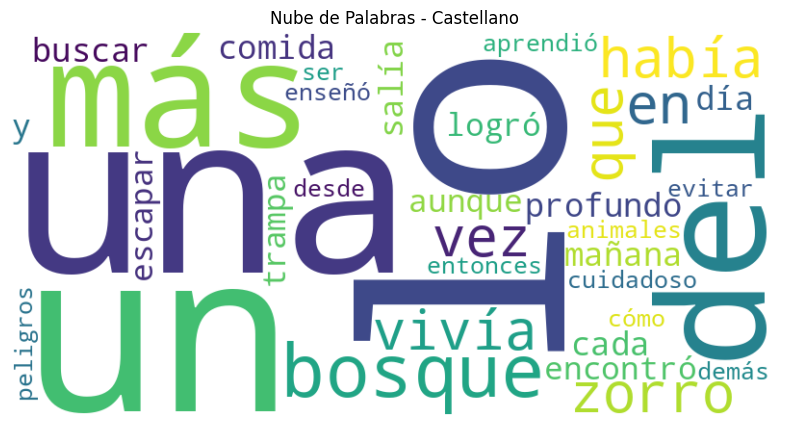

In [28]:
# Generar nube de palabras solo para castellano
texto_cast = " ".join(df[df['lengua'] == 'castellano']['texto_limpio'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_cast)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Castellano")
plt.show()

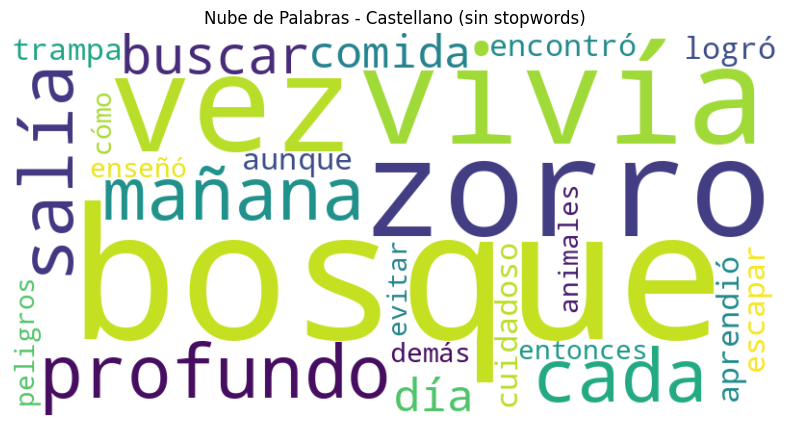

In [29]:
# Descargar las stopwords si no lo has hecho aún
# nltk.download('stopwords')

# Crear un conjunto de stopwords en español
stopwords_esp = set(stopwords.words('spanish'))

# También puedes agregar palabras adicionales si lo deseas
stopwords_esp.update(["año", "a", "aún", "sí", "ser", "tener"])  # ejemplo de expansión

# Filtrar solo textos en castellano
texto_cast = " ".join(df[df['lengua'] == 'castellano']['texto_limpio'])

# Generar la nube de palabras sin las stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords_esp).generate(texto_cast)

# Mostrar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Castellano (sin stopwords)")
plt.show()

In [30]:
vectorizer = CountVectorizer() #BagOfWords
X = vectorizer.fit_transform(df['texto_limpio'])

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,ani,animales,aprendió,aunque,baxa,bosque,buscar,cada,comida,cuidadoso,...,shiná,trampa,un,una,vez,vivía,xawanai,xobo,zorro,áinati
0,0,1,1,1,0,2,1,1,1,1,...,0,1,2,2,1,1,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,1
